In [11]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
df = pd.read_csv('Main Clustered Data.csv')
df.drop(df.columns[0],inplace=True,axis=1)
df

,price,enginetype,fueltype,aspiration,carbody,cylindernumber,drivewheel,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,cluster
0,13495,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,2
1,16500,0,1,0,0,2,2,88.6,2548,130,3.47,111,21,27,168.8,64.1,2
2,16500,5,1,0,2,3,2,94.5,2823,152,2.68,154,19,26,171.2,65.5,2
3,13950,3,1,0,3,2,1,99.8,2337,109,3.19,102,24,30,176.6,66.2,2
4,17450,3,1,0,3,1,0,99.4,2824,136,3.19,115,18,22,176.6,66.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,3,1,0,3,2,2,109.1,2952,141,3.78,114,23,28,188.8,68.9,2
201,19045,3,1,1,3,2,2,109.1,3049,141,3.78,160,19,25,188.8,68.8,2
202,21485,5,1,0,3,3,2,109.1,3012,173,3.58,134,18,23,188.8,68.9,2
203,22470,3,0,1,3,3,2,109.1,3217,145,3.01,106,26,27,188.8,68.9,2


## Classification Using K Nearest Neighbors

In [18]:
# train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x , y = df.loc[: , df.columns != 'cluster'] , df.loc[:, 'cluster']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)



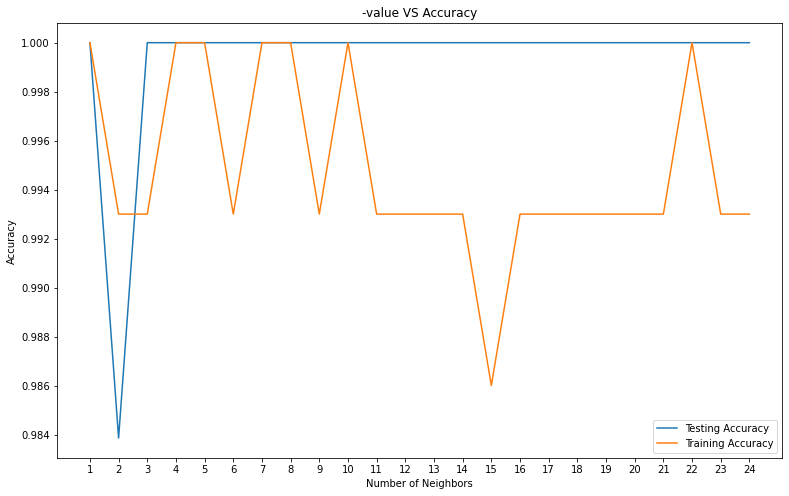

Best accuracy is 1.0 with K = 1


In [19]:
# Finding the best K neighbors
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

# Loop over different values of k
for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

# Plot
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [20]:
# So 3 is the best K not 1
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('With KNN (K=3) accuracy is: ',knn.score(x_test,y_test)) # accuracy

Prediction: [0 0 0 0 0 2 0 0 0 0 2 2 2 0 2 0 0 0 2 0 0 0 2 0 0 0 2 0 0 0 0 0 1 0 2 0 0
 1 2 2 0 2 0 0 0 0 1 0 2 2 1 0 2 0 0 0 0 0 2 0 0 0]
With KNN (K=3) accuracy is:  1.0


### Accuracy is 100% at K = 3 and above